## Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic.

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19.

They want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bik?s.
How well those variables describe the bike dema?nons

## 1. Importing required libraries.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


import warnings
warnings.filterwarnings('ignore')

## 2. Reading and understanding the data:

In [80]:
bike_sharing = pd.read_csv('day.csv')
bike_sharing.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [82]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [84]:
bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [86]:
bike_sharing.value_counts()

instant  dteday      season  yr  mnth  holiday  weekday  workingday  weathersit  temp       atemp     hum      windspeed  casual  registered  cnt 
1        01-01-2018  1       0   1     0        6        0           2           14.110847  18.18125  80.5833  10.749882  331     654         985     1
480      25-04-2019  2       1   4     0        3        1           1           19.543347  23.51585  42.7917  7.959064   655     5541        6196    1
482      27-04-2019  2       1   4     0        5        1           1           18.757500  22.63185  40.0833  23.291411  1014    5219        6233    1
483      28-04-2019  2       1   4     0        6        0           2           15.443347  18.87520  48.9583  8.708325   1120    3100        4220    1
484      29-04-2019  2       1   4     0        0        0           1           18.791653  22.50605  58.7083  7.832836   2229    4075        6304    1
                                                                                             

In [88]:
bike_sharing.shape

(730, 16)

#### (i) Renaming columns for better interpretation

In [90]:
bike_sharing.rename(columns={
    'instant':'Sl.No',
    "dteday":"date",
    "yr":"year",
    "mnth":"month",
    "weathersit":"weather_condition",
    "hum":"humidity",
    "cnt":"total_count"
},inplace=True)

In [92]:
bike_sharing.head()

,Sl.No,date,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### (ii) Typecasting the datetime and numerical attributes to category

In [94]:

bike_sharing['season'] = bike_sharing.season.astype('category')
bike_sharing['year'] = bike_sharing.year.astype('category')
bike_sharing['month'] = bike_sharing.month.astype('category')
bike_sharing['holiday'] = bike_sharing.holiday.astype('category')
bike_sharing['weekday'] = bike_sharing.weekday.astype('category')
bike_sharing['workingday'] = bike_sharing.workingday.astype('category')
bike_sharing['weather_condition'] = bike_sharing.weather_condition.astype('category')

### 3. Visualization of numeric variables

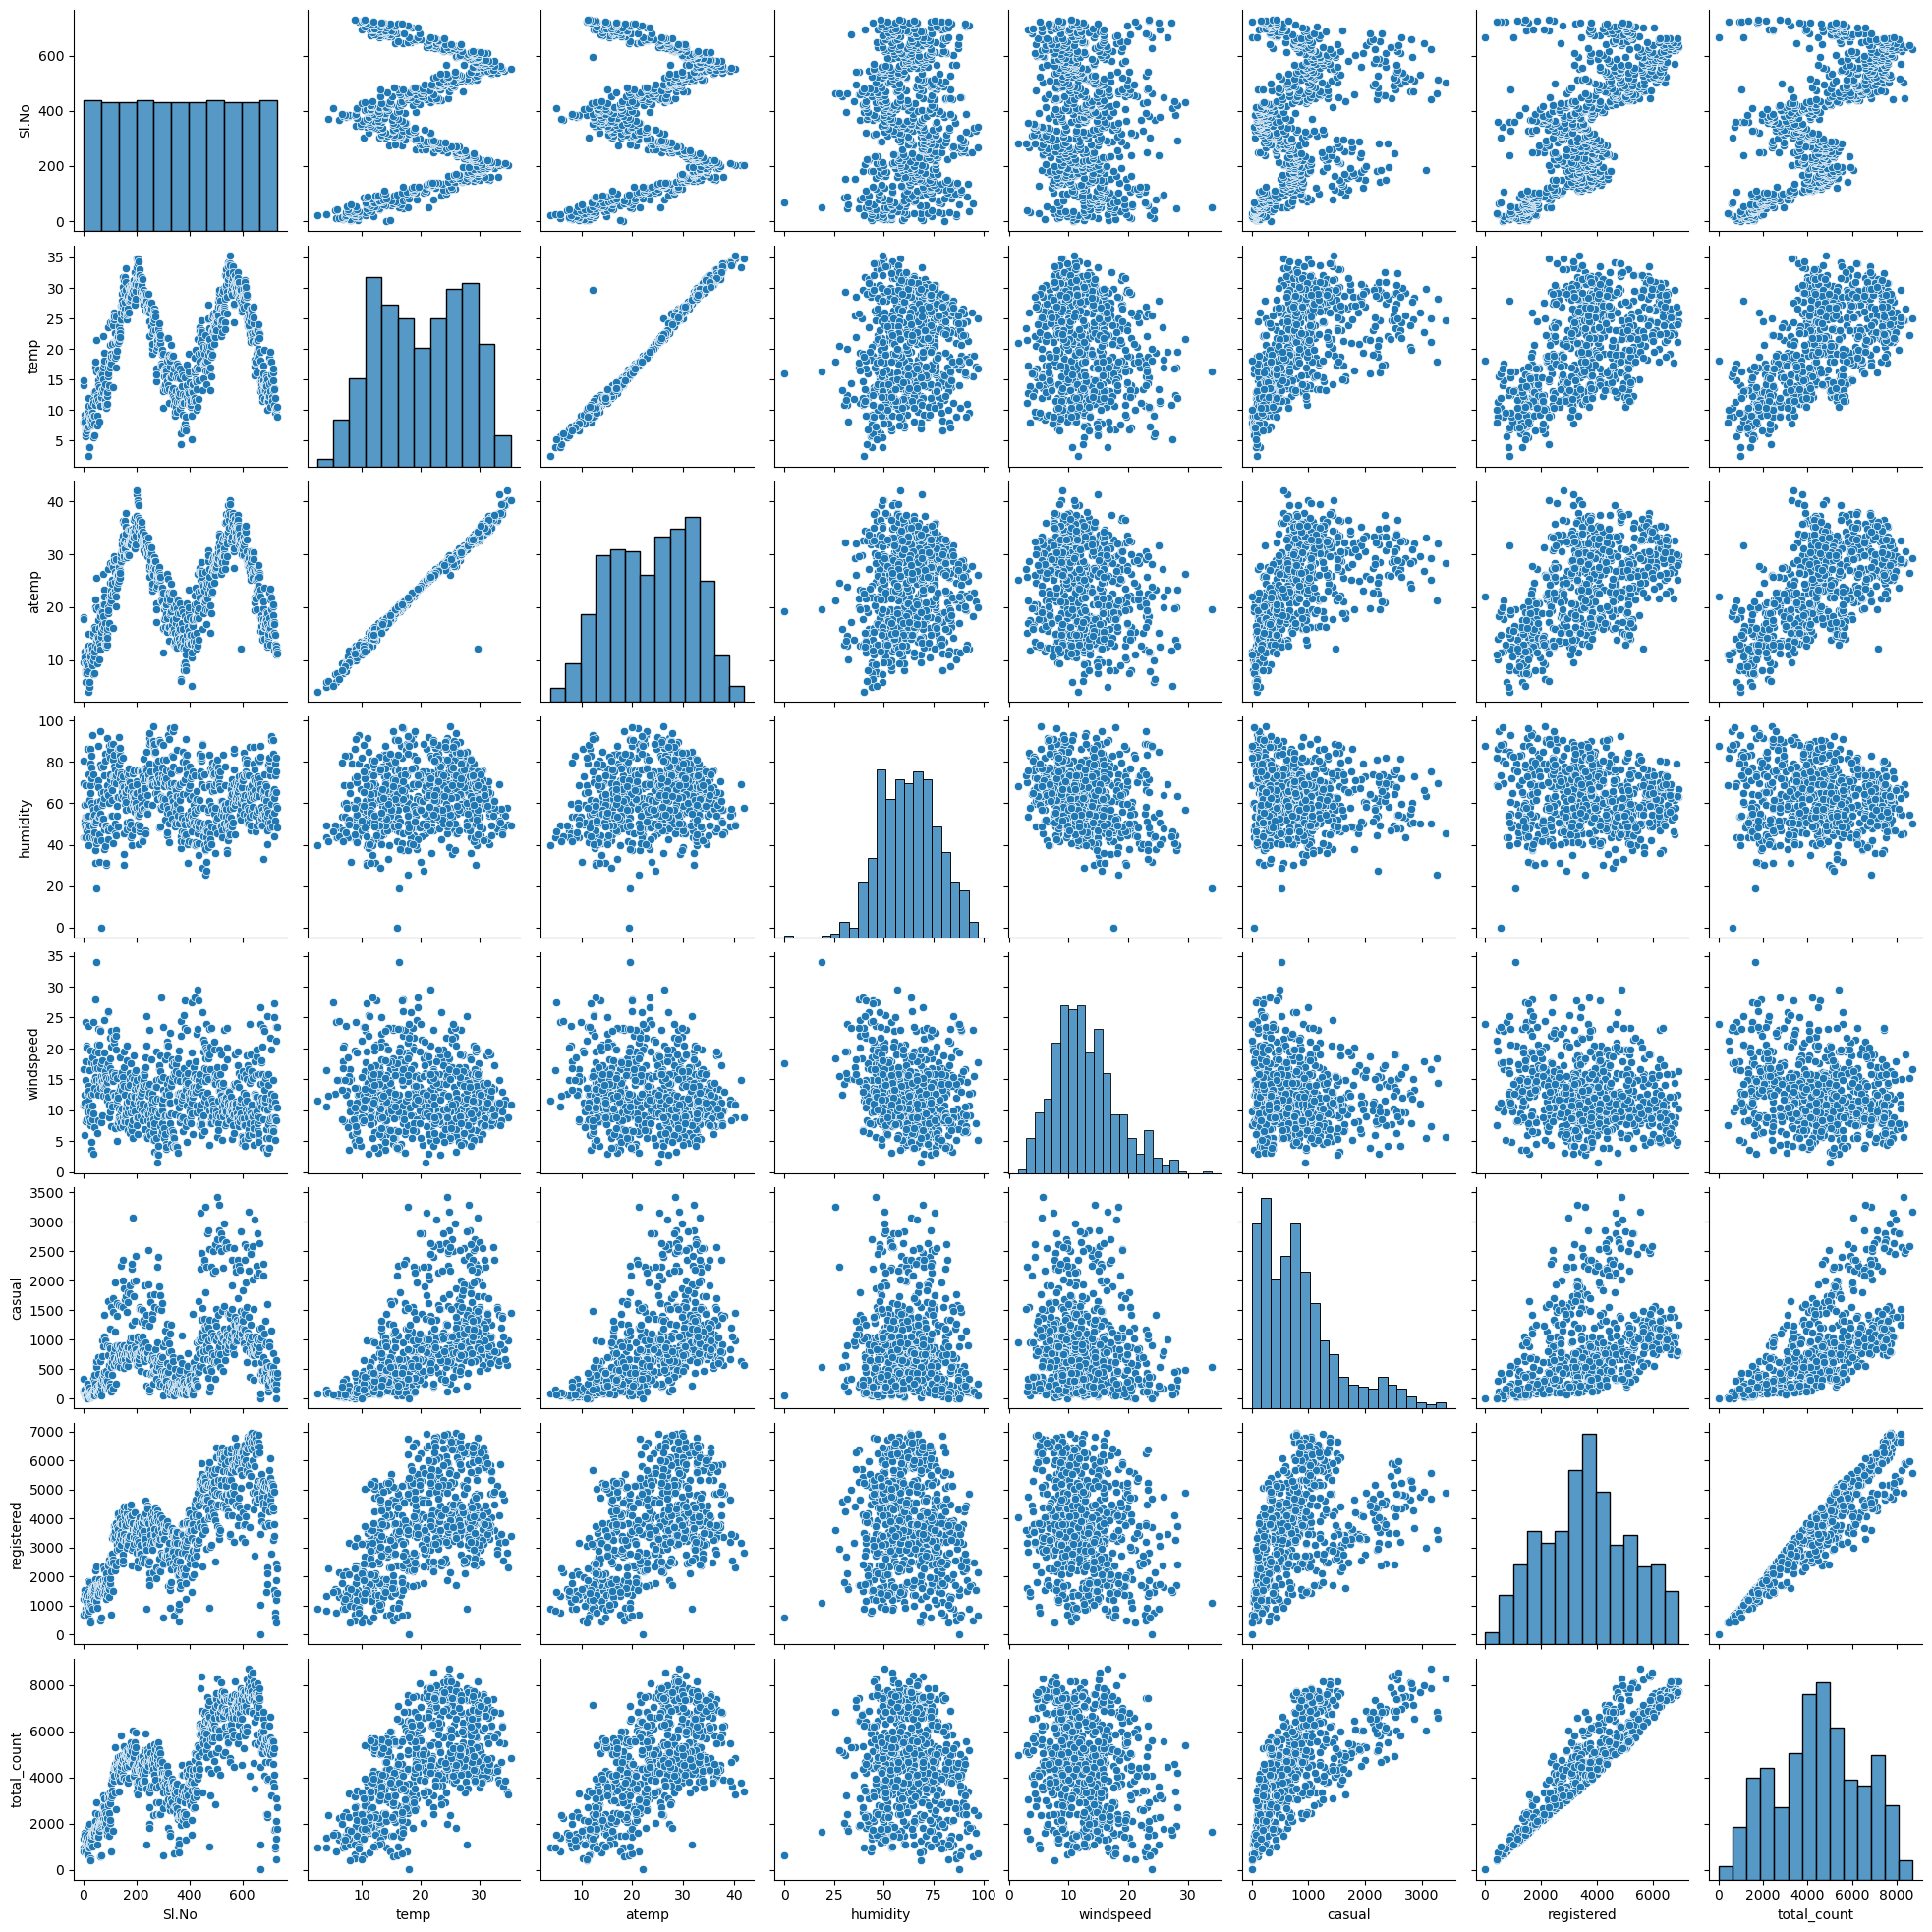

In [16]:
sns.pairplot(bike_sharing)
plt.show()

In [17]:
# Sl.No and date not useful for visualization hence dropped.
bike_sharing_2 = bike_sharing.drop(['Sl.No', 'date'],axis=1)
bike_sharing_2

,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [18]:
#Create the correlation matrix
corr_mtr=bike_sharing_2[["temp","atemp","humidity","windspeed","casual","registered","total_count"]].corr()
corr_mtr

,temp,atemp,humidity,windspeed,casual,registered,total_count
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
humidity,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
total_count,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


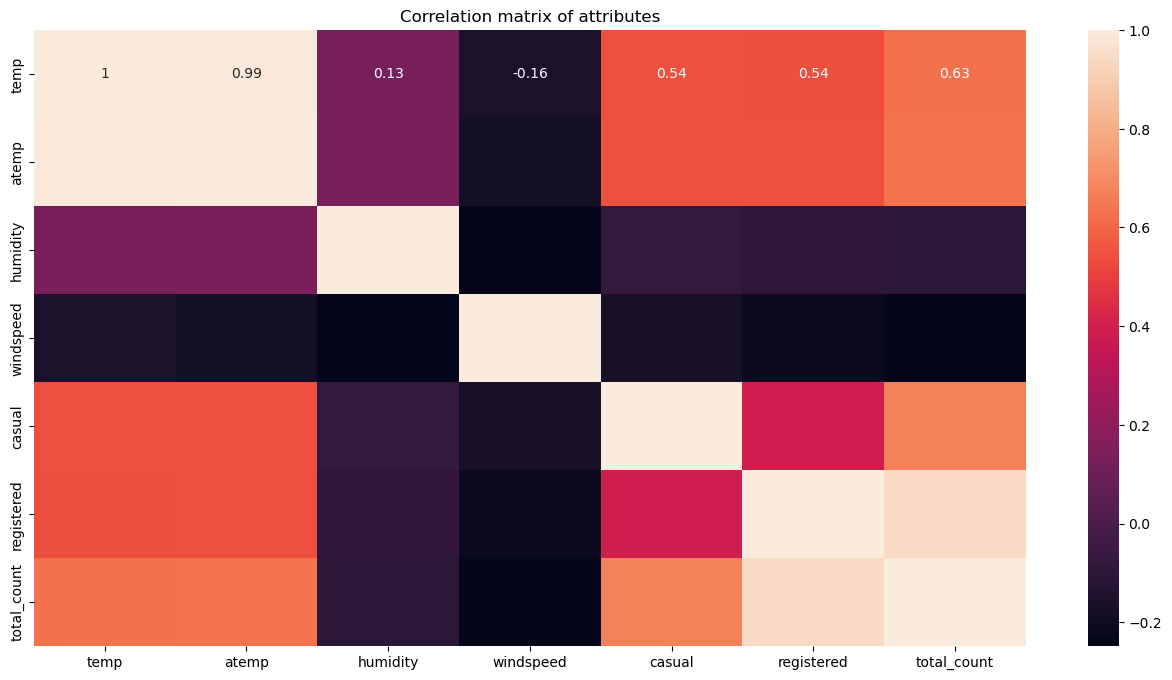

In [19]:
# Heat map for correlation matrix of attributes
fig,ax=plt.subplots(figsize=(16,8))
ax.set_title('Correlation matrix of attributes')
sns.heatmap(corr_mtr,annot=True,ax=ax)

plt.show()

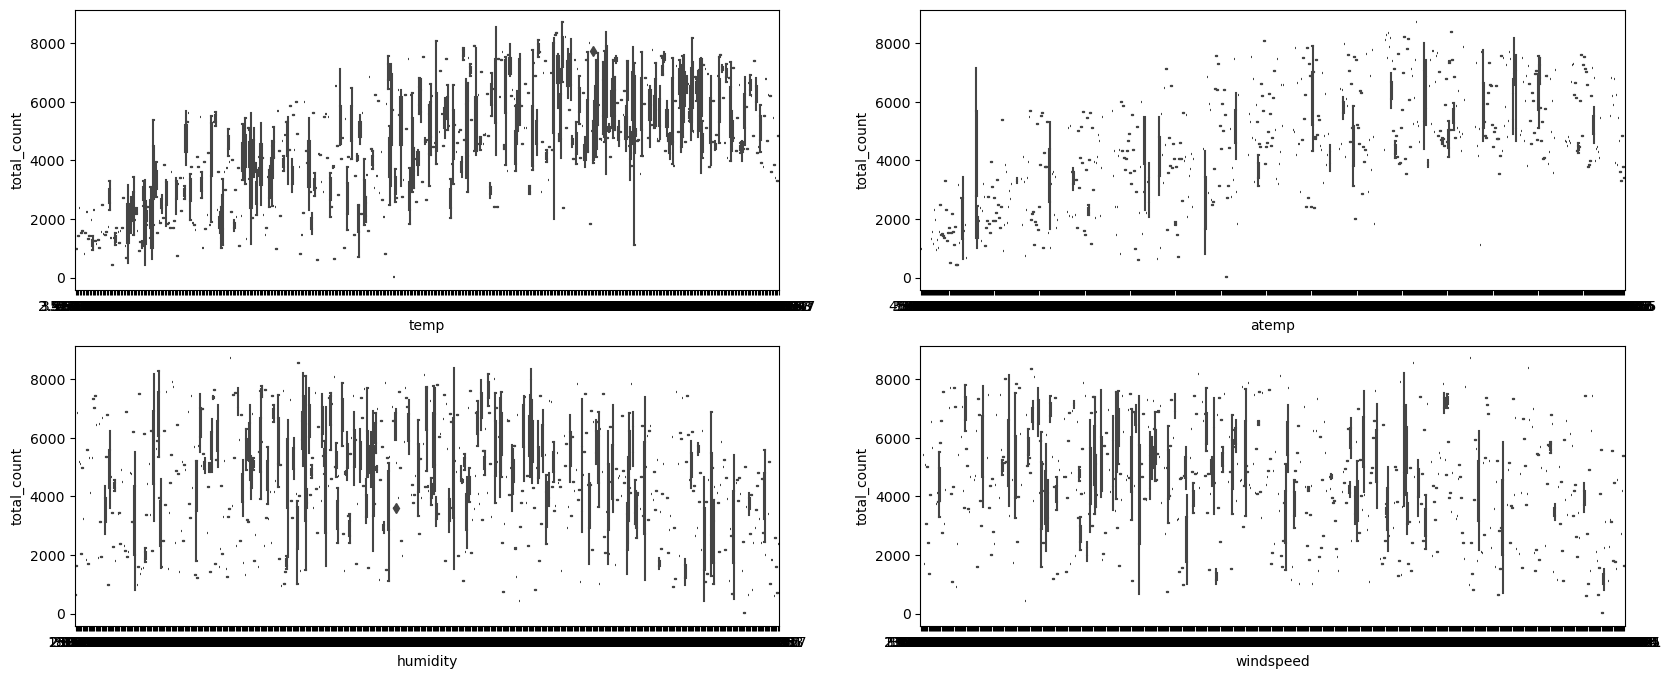

In [20]:
# Visualization of categorical variables
plt.figure(figsize=(20,8))
plt.subplot(2, 2, 1)
sns.boxplot(x='temp', y='total_count', data=bike_sharing_2)

plt.subplot(2, 2, 2)
sns.boxplot(x='atemp', y='total_count', data=bike_sharing_2)

plt.subplot(2, 2, 3)
sns.boxplot(x='humidity', y='total_count', data=bike_sharing_2)

plt.subplot(2, 2, 4)
sns.boxplot(x='windspeed', y='total_count', data=bike_sharing_2)

plt.show()

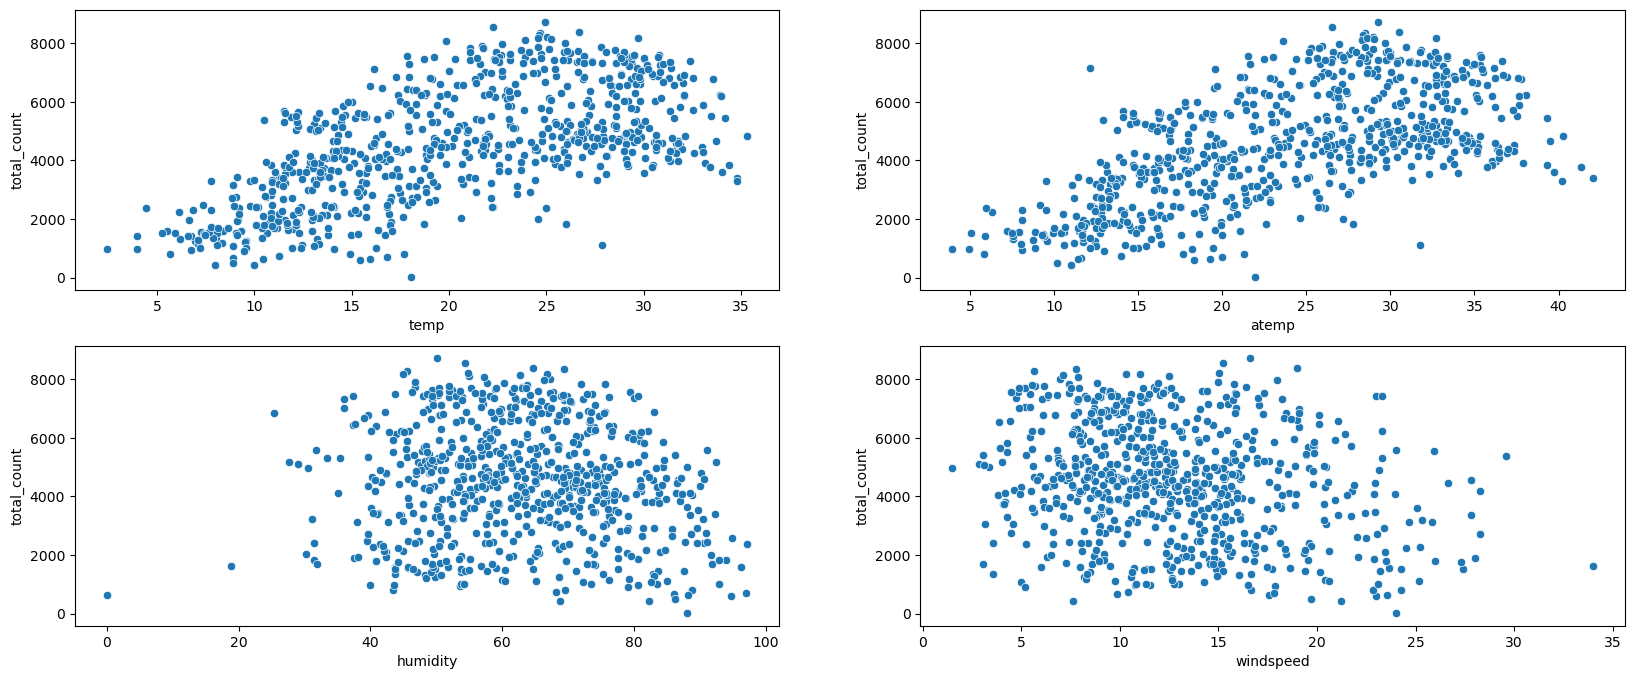

In [21]:

plt.figure(figsize=(20,8))
plt.subplot(2, 2, 1)
sns.scatterplot(x='temp', y='total_count', data=bike_sharing_2)

plt.subplot(2, 2, 2)
sns.scatterplot(x='atemp', y='total_count', data=bike_sharing_2)

plt.subplot(2, 2, 3)
sns.scatterplot(x='humidity', y='total_count', data=bike_sharing_2)

plt.subplot(2, 2, 4)
sns.scatterplot(x='windspeed', y='total_count', data=bike_sharing_2)

plt.show()


### 4. Attributes distributions and trends

#### (i). Monthly distribution of counts
#### (ii). Year wise distribution of counts
#### (iii). Holiday wise distribution of counts
#### (iv). Workingday-wise distribution of counts
#### (v). Weather_condition_wise distribution of counts

<hr>
<hr>

#### (i) Monthly distribution of counts

AttributeError: 'int' object has no attribute 'startswith'

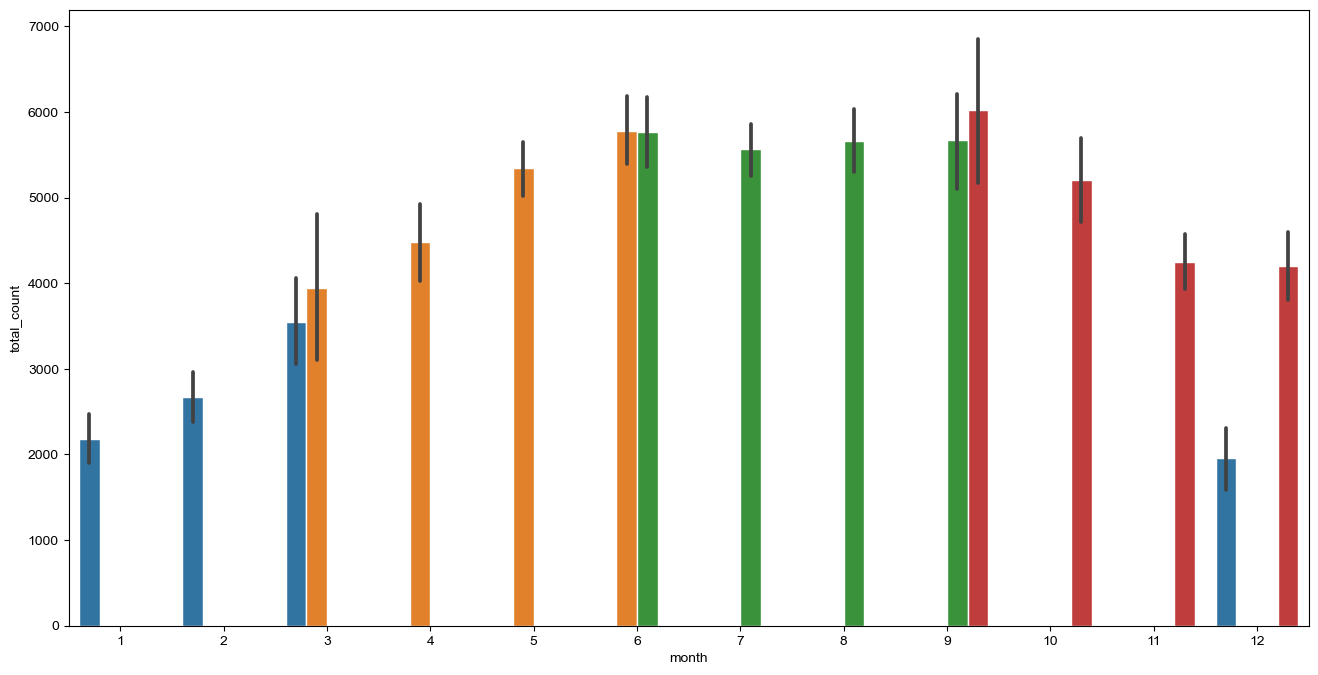

In [24]:
# Barplot for seasonwise monthly distribution of counts

fig,ax = plt.subplots(figsize=(16,8))
sns.set_style('dark') 

sns.barplot(x='month',y = 'total_count',data=bike_sharing_2[['month','total_count','season']],ax=ax, hue='season')
ax.set_title('Seasonwise monthly distribution of counts')
plt.show()

AttributeError: 'int' object has no attribute 'startswith'

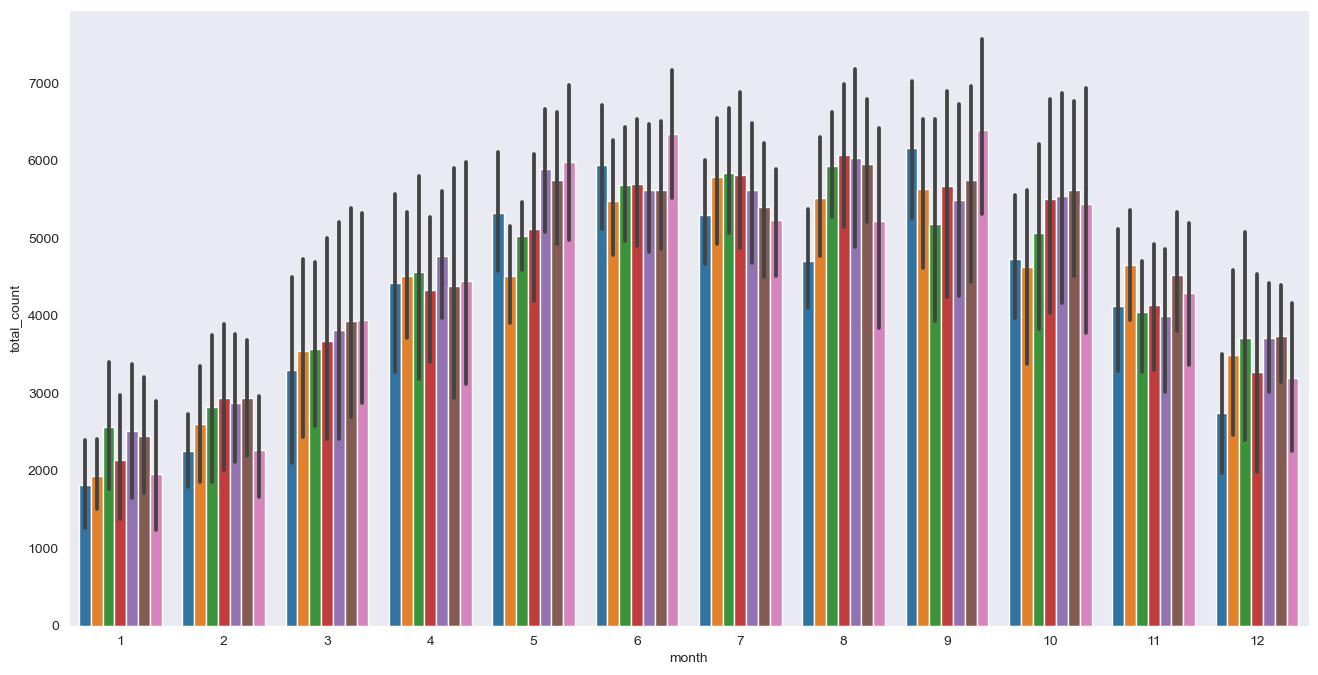

In [96]:
# Barplot for weekday-wise monthly distribution of counts

fig,ax1 = plt.subplots(figsize=(16,8))
sns.set_style('dark') 
# Barplot for seasonwise monthly distribution of counts

sns.barplot(data=bike_sharing_2[['month','total_count','weekday']], x='month',y = 'total_count',ax=ax1, hue='weekday')
ax1.set_title('Weekday-wise monthly distribution of counts')
plt.show()

From the above plots, we can observe that there is an increase in the bike rental count in spring and summer season , and then a decrease in the bike rental count in fall and winter season.

Here, Season 1 -> Spring Season 2 -> Summer Season 3 -> Fall Season 4 -> Winter

### (ii). Year wise distribution of counts

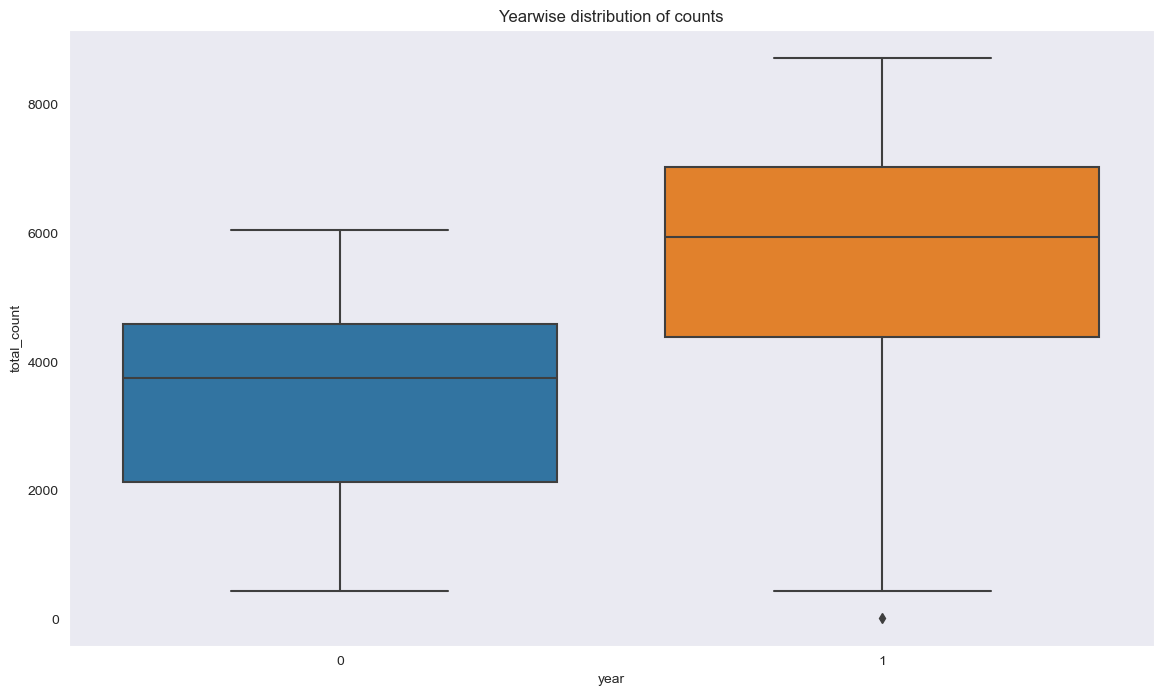

In [97]:
# Boxplot for yearwise distribution of counts

fig,ax = plt.subplots(figsize=(14,8))

sns.boxplot(data=bike_sharing_2[['year','total_count']], x='year',y = 'total_count')
ax.set_title('Yearwise distribution of counts')
plt.show()

From the box plot, we can observe that the bike rental count distribution is higher in 2019 than in 2018.<br>
Here, 0 -> year 2018 1 -> year 2019

### (iii). Holiday wise distribution of counts

AttributeError: 'int' object has no attribute 'startswith'

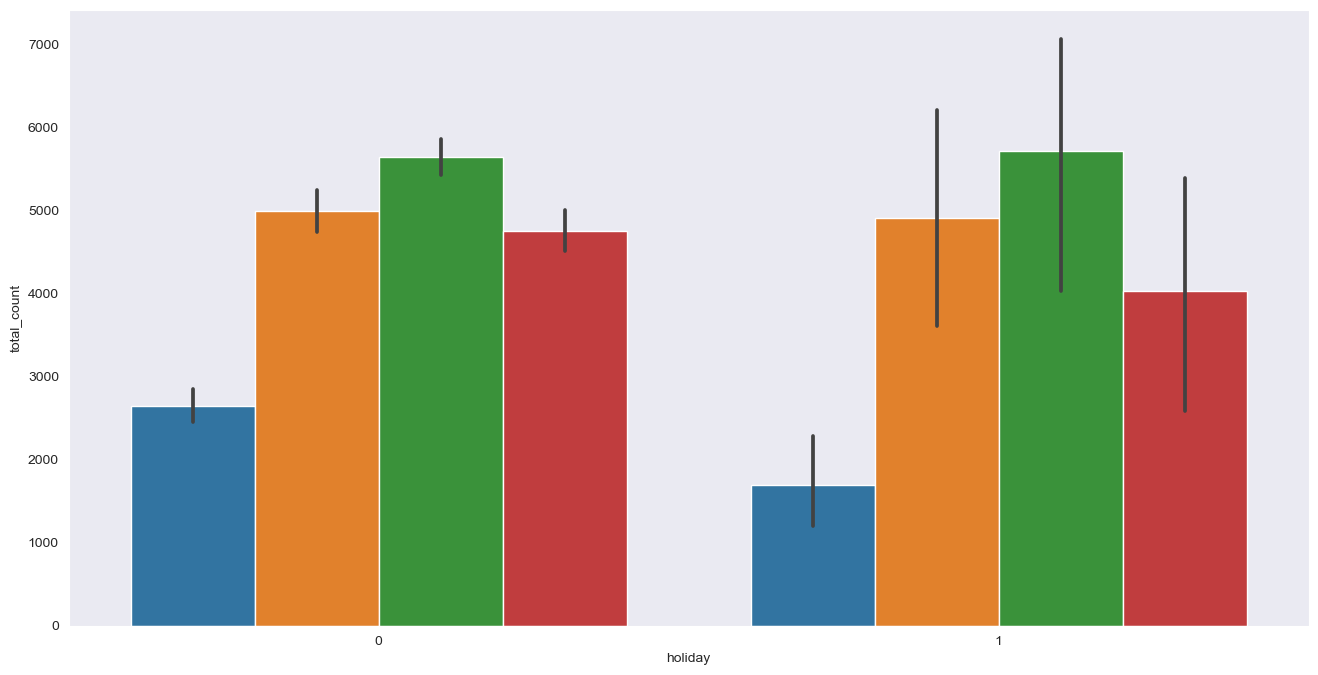

In [99]:
# Barplot for holiday distribution of counts

fig,ax = plt.subplots(figsize=(16,8))

sns.set_style('dark') 
sns.barplot(hue='season', data = bike_sharing_2, x='holiday',y = 'total_count')
ax.set_title('Holiday-wise distribution of counts')
plt.show()

From the above bar plot, we can observe that during no holidays, the bike rental counts is the highest, compared to during holidays for different seasons.

Here, 0-> No holiday,
1-> Holiday

### (iv). Workingday-wise distribution of counts

AttributeError: 'int' object has no attribute 'startswith'

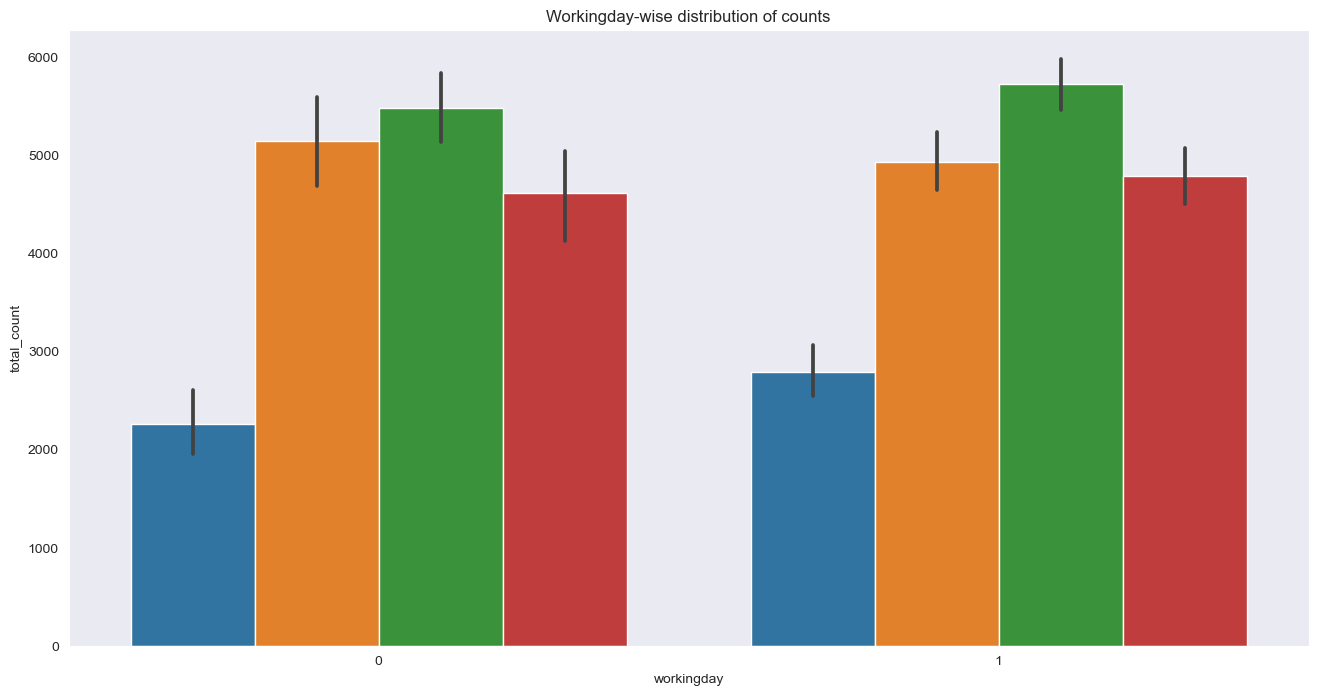

In [101]:
fig,ax = plt.subplots(figsize=(16,8))

# Barplot for workingday distribution of counts
ax.set_title('Workingday-wise distribution of counts')
sns.barplot(data = bike_sharing_2, hue='season', x='workingday',y = 'total_count')
plt.show()

From the above bar plot, we can observe that there is no significant change in bike demand with working days and non working days.

Here, 0-> No working day, 1-> Working day

### (v). Weather_condition_wise distribution of counts

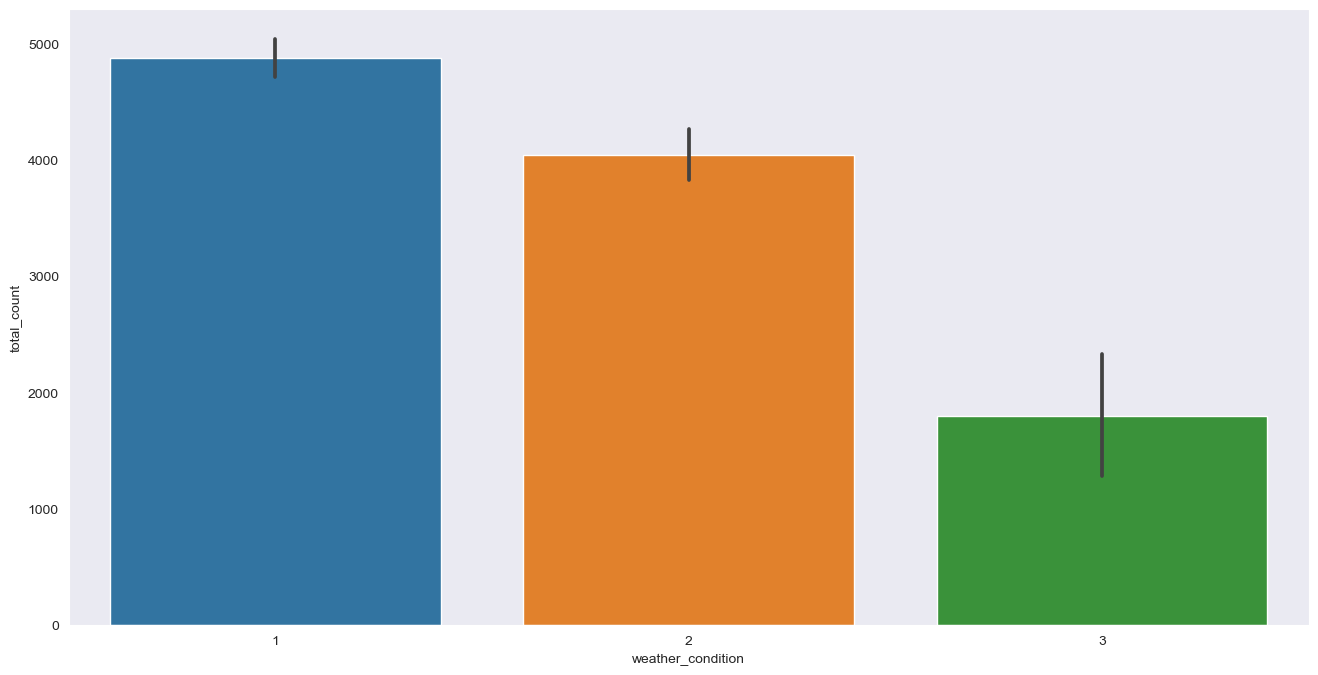

In [103]:
# Barplot for Weather_condition_wise distribution of counts

fig,ax1 = plt.subplots(figsize=(16,8))

ax.set_title('Weather_condition_wise distribution of counts')
sns.barplot(ax=ax1, data = bike_sharing_2[['month','total_count','weather_condition']], x='weather_condition',y = 'total_count')

plt.show()

From the above bar plot, we can observe that during clear, partly cloudy weather, the bike rental count is the highest, second-highest during misty cloudy weather, and followed by 3rd highest, during light snow, light rain weather and Scattered clouds. No bike rentals on Heavy rain and Ice pallets weather condition.

### 5. Outlier analysisrs.

#### (i) Total_count_outliers

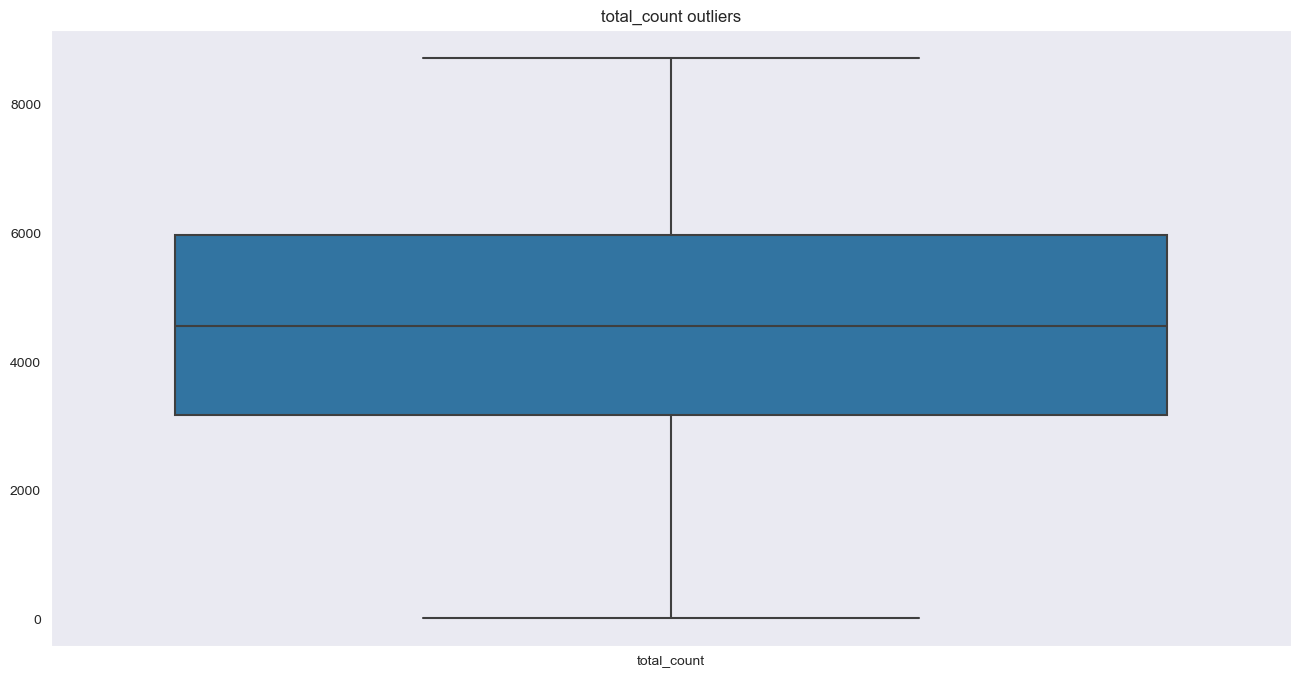

In [105]:
fig,ax=plt.subplots(figsize=(16,8))
#Boxplot for total_count outliers
ax.set_title('total_count outliers')
sns.boxplot(data=bike_sharing_2[['total_count']])

plt.show()

#### (ii) Temp_windspeed_humidity_outliers

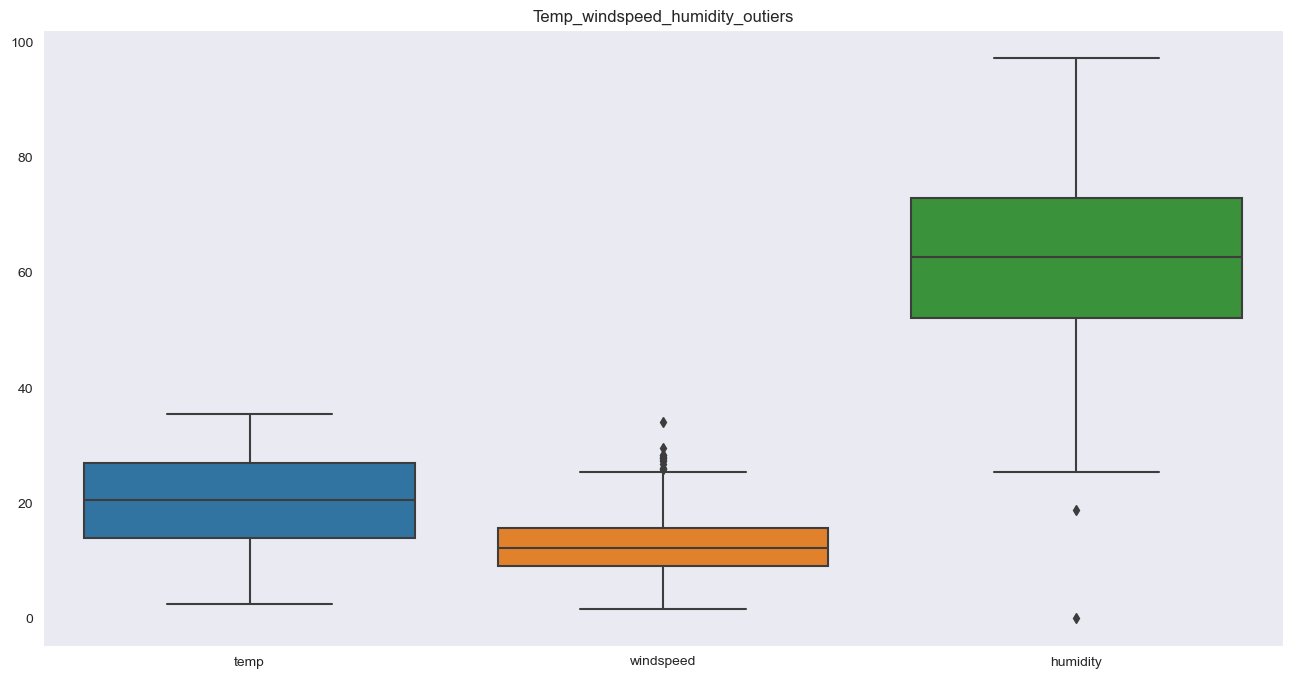

In [107]:
fig,ax=plt.subplots(figsize=(16,8))
#Box plot for Temp_windspeed_humidity_outliers
ax.set_title('Temp_windspeed_humidity_outiers')
sns.boxplot(data=bike_sharing_2[['temp','windspeed','humidity']])

plt.show()

##### The effect of outliers on linear regression includes:
 i) Disproportionately influencing the regression line, leading to misleading conclusions and reduced predictive accuracy.<br>
 ii) Omitting outliers can affect the correlation among variables and the fit of the line.<br>
 iii) Outliers can cause trouble in predicting data both with and without the regress line. <br>
 iv) Linear regression may find a worse and more biased fit with inferior predictive performance due to outliers.

 Hence outliers should be imputed.

#### (iii) Replace and impute the outliers

In [109]:
# dataframe for outliers
wind_hum=pd.DataFrame(bike_sharing_2,columns=['windspeed','humidity'])
 #col_names for outliers                     
col_names=['windspeed','humidity']       
                      
for i in col_names:
    q75,q25=np.percentile(wind_hum.loc[:,i],[75,25]) # Divide data into 75%quantile and 25%quantile.
    iqr=q75-q25 #Inter quantile range
    max=q75+(iqr*1.5) #outer fence
    min=q25-(iqr*1.5) #inner fence
    wind_hum.loc[wind_hum.loc[:,i]<min,:i]=np.nan  #Replace with NA
    wind_hum.loc[wind_hum.loc[:,i]>max,:i]=np.nan  #Replace with NA
#Imputating the outliers by mean Imputation
wind_hum['humidity']=wind_hum['humidity'].fillna(wind_hum['humidity'].mean())
wind_hum['windspeed']=wind_hum['windspeed'].fillna(wind_hum['windspeed'].mean())

#### (iv) Replace the original dataset to imputated data

In [111]:
#Replacing the imputated humidity
bike_sharing_2['humidity']=bike_sharing_2['humidity'].replace(wind_hum['humidity'])
#Replacing the imputated windspeed
bike_sharing_2['windspeed']=bike_sharing_2['windspeed'].replace(wind_hum['windspeed'])
bike_sharing_2.head(5)

,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


<Axes: xlabel='workingday', ylabel='total_count'>

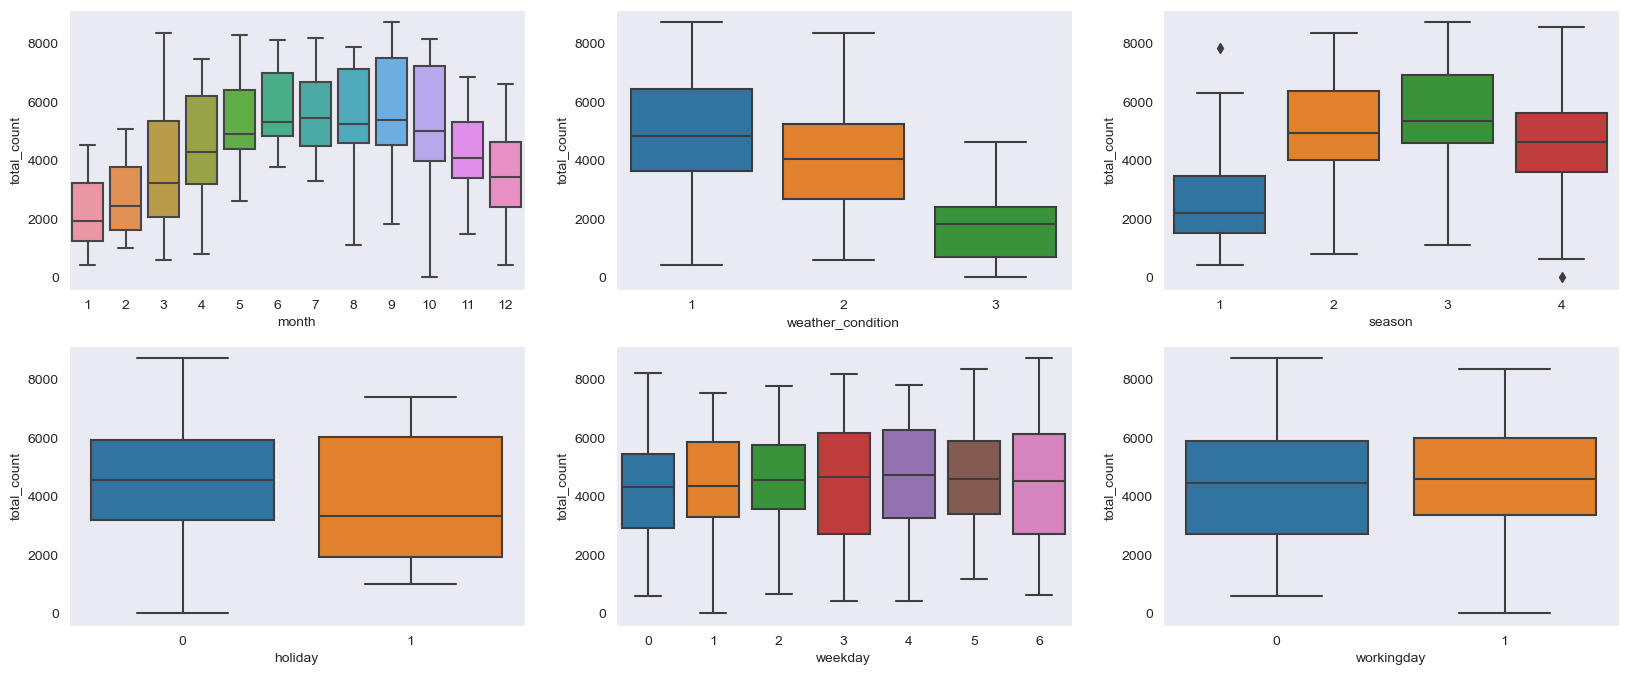

In [113]:
plt.figure(figsize=(20,8))
plt.subplot(2, 3, 1)
sns.boxplot(x='month', y='total_count', data=bike_sharing_2)

plt.subplot(2, 3, 2)
sns.boxplot(x='weather_condition', y='total_count', data=bike_sharing_2)

plt.subplot(2, 3, 3)
sns.boxplot(x='season', y='total_count', data=bike_sharing_2)

plt.subplot(2, 3, 4)
sns.boxplot(x='holiday', y='total_count', data=bike_sharing_2)

plt.subplot(2, 3, 5)
sns.boxplot(x='weekday', y='total_count', data=bike_sharing_2)

plt.subplot(2, 3, 6)
sns.boxplot(x='workingday', y='total_count', data=bike_sharing_2)

### Correlation matrix after imputation

In [116]:
bike_sharing_2[["temp","atemp","humidity","windspeed","casual","registered","total_count"]].corr()

,temp,atemp,humidity,windspeed,casual,registered,total_count
temp,1.000000,0.991696,0.105682,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.118178,-0.183876,0.543362,0.543678,0.630685
humidity,0.105682,0.118178,1.000000,-0.256054,-0.077694,-0.077551,-0.090029
windspeed,-0.158186,-0.183876,-0.256054,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.077694,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.077551,-0.217914,0.394137,1.000000,0.945411
total_count,0.627044,0.630685,-0.090029,-0.235132,0.672123,0.945411,1.000000


1. Temp, atemp and total_count are positively correlated.
2. humidity, windspeed and toatal_count are negatively correlated

<b><hr></b>

In [118]:
dummy_1 = pd.get_dummies(bike_sharing_2[['season','month', 'weekday', 'weather_condition']], drop_first = True).astype('int')
bike_sharing_2 = pd.concat([bike_sharing_2, dummy_1], axis=1)
bike_sharing_2

,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,...,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weather_condition_2,weather_condition_3
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,0,1,1,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,0,1,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,0,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,...,0,1,0,0,0,1,0,0,1,0
726,1,1,12,0,5,1,2,10.386653,12.75230,53.5000,...,0,1,0,0,0,0,1,0,1,0
727,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,...,0,1,0,0,0,0,0,1,1,0
728,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,...,0,1,0,0,0,0,0,0,0,0


In [120]:
bike_sharing_2.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weather_condition', 'temp', 'atemp', 'humidity', 'windspeed', 'casual',
       'registered', 'total_count', 'season_2', 'season_3', 'season_4',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'weather_condition_2', 'weather_condition_3'],
      dtype='object')

In [122]:
# Dropping original and irrelavant variables
bike_sharing_2 = bike_sharing_2.drop(['season', 'month', 'weekday', 'weather_condition', 'casual',
       'registered'], axis=1)


In [124]:
bike_sharing_2.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,total_count,season_2,season_3,...,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weather_condition_2,weather_condition_3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,0,0,0


In [126]:
bike_sharing_2.describe()

,temp,atemp,humidity,windspeed,total_count,season_2,season_3,season_4,month_2,month_3,...,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weather_condition_2,weather_condition_3
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.659986,12.763620,4508.006849,0.252055,0.257534,0.243836,0.076712,0.084932,...,0.082192,0.084932,0.143836,0.142466,0.141096,0.142466,0.142466,0.143836,0.336986,0.028767
std,7.506729,8.150308,13.952239,5.195841,1936.011647,0.434490,0.437576,0.429689,0.266317,0.278971,...,0.274845,0.278971,0.351164,0.349767,0.348359,0.349767,0.349767,0.351164,0.473004,0.167266
min,2.424346,3.953480,18.791700,1.500244,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.811885,16.889713,51.989600,9.041650,3169.750000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20.465826,24.368225,62.830897,12.125325,4548.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,26.880615,30.445775,72.864575,15.625589,5966.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### 6. Preparing the dataset for modelling

##### i) Split the dataset into train and test in the ratio of 70:30

In [129]:
df_train, df_test = train_test_split(bike_sharing_2, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


##### ii) Rescaling the features
1. Min-Max Scaling (normalisation)
2. Standardisation (mean-0, sigma-1)

In [131]:
# Instantiate an object
scaler = MinMaxScaler()
# Create a list of numerical varaiables
num_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'total_count']
# Fit on data
df_train[num_vars]= scaler.fit_transform(df_train[num_vars])
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,total_count,season_2,season_3,...,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weather_condition_2,weather_condition_3
576,1,0,1,0.815169,0.766351,0.659744,0.264686,0.827658,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.553780,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.200348,0.377528,0.663106,0.204096,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.385516,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,1,1,0
111,0,0,1,0.345824,0.318819,0.692225,0.380981,0.191095,1,0,...,0,0,0,0,0,0,1,0,1,0


In [133]:
df_train[num_vars].describe()

,temp,atemp,humidity,windspeed,total_count
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.562792,0.320883,0.513499
std,0.225858,0.212410,0.175815,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.428913,0.199179,0.356420
50%,0.542596,0.529718,0.568956,0.296763,0.518638
75%,0.735215,0.688457,0.691560,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000


##### iii) Train the model

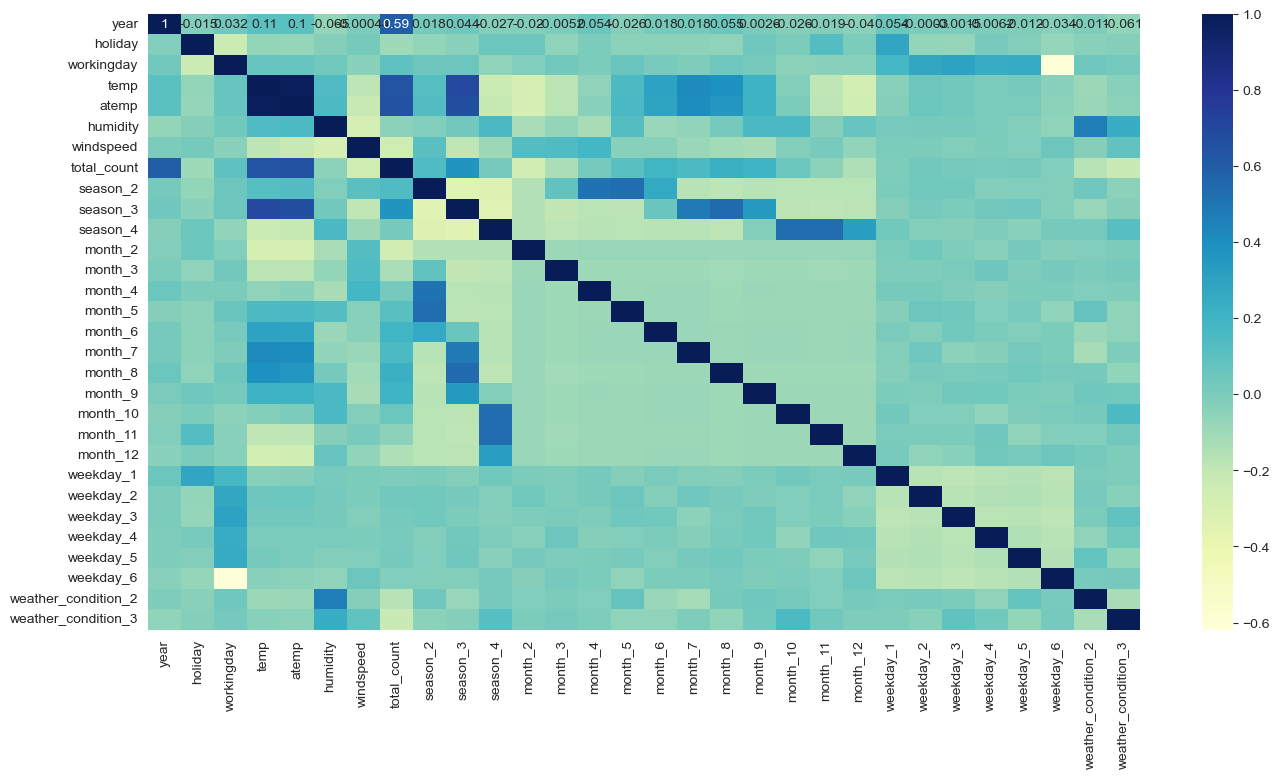

In [135]:
# Heat Map
plt.figure(figsize = (16,8))
sns.heatmap(df_train.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [137]:
# X_train, y_train
y_train = df_train.pop('total_count')
X_train = df_train

In [139]:
X_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,season_2,season_3,season_4,...,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weather_condition_2,weather_condition_3
576,1,0,1,0.815169,0.766351,0.659744,0.264686,0,1,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.553780,0.255342,0,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.200348,0.377528,0.663106,0,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.385516,0.188475,1,0,0,...,0,0,0,0,0,0,0,1,1,0
111,0,0,1,0.345824,0.318819,0.692225,0.380981,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [141]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: total_count, dtype: float64

### Adding varaible one by one  for understanding only

In [143]:
# Add constant
X_train_sm = sm.add_constant(X_train['temp'])

# Create first model
lr = sm.OLS(y_train, X_train_sm)

# Fit
lr_model = lr.fit()

lr_model.params

const    0.169031
temp     0.640944
dtype: float64

In [145]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Wed, 04 Sep 2024   Prob (F-statistic):           2.46e-61
Time:                        05:20:04   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.000       0.130       0.208
temp           0.6409      0.034     19.026      0.000       0.575       0.707
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [147]:
# Add another variable atemp
X_train_sm = X_train[['temp', 'atemp']]
X_train_sm = sm.add_constant(X_train[['temp', 'atemp']])

# Create first model
lr = sm.OLS(y_train, X_train_sm)

# Fit
lr_model = lr.fit()

lr_model.params

const    0.162664
temp     0.185345
atemp    0.489566
dtype: float64

In [149]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 04 Sep 2024   Prob (F-statistic):           8.38e-61
Time:                        05:20:21   Log-Likelihood:                 178.05
No. Observations:                 510   AIC:                            -350.1
Df Residuals:                     507   BIC:                            -337.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1627      0.020      8.198      0.000       0.124       0.202
temp           0.1853      0.233      0.796      0.426      -0.272       0.643
atemp          0.4896      0.248      1.977      0.049       0.003       0.976
==============================================================================
Omnibus:                        4.986   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.083   Jarque-Bera (JB):                3.696
Skew:                           0.070   Prob(JB):                        0.158
Kurtosis:                       2.607   Cond. No.                         56.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [151]:
# Add another variable humidity
X_train_sm = X_train[['temp', 'atemp', 'humidity']]
X_train_sm = sm.add_constant(X_train[['temp', 'atemp', 'humidity']])

# Create first model
lr = sm.OLS(y_train, X_train_sm)

# Fit
lr_model = lr.fit()

lr_model.params

const       0.256184
temp        0.096807
atemp       0.607203
humidity   -0.188884
dtype: float64

In [153]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     133.5
Date:                Wed, 04 Sep 2024   Prob (F-statistic):           1.06e-63
Time:                        05:20:38   Log-Likelihood:                 187.55
No. Observations:                 510   AIC:                            -367.1
Df Residuals:                     506   BIC:                            -350.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2562      0.029      8.864      0.000       0.199       0.313
temp           0.0968      0.230      0.422      0.674      -0.354       0.548
atemp          0.6072      0.245      2.481      0.013       0.126       1.088
humidity      -0.1889      0.043     -4.383      0.000      -0.274      -0.104
==============================================================================
Omnibus:                        1.894   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.388   Jarque-Bera (JB):                1.738
Skew:                           0.048   Prob(JB):                        0.419
Kurtosis:                       2.730   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Adding all varaibles to model and delete one by one insignificant variables, for understanding only.

In [155]:
bike_sharing_2.columns

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'total_count', 'season_2', 'season_3', 'season_4',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'weather_condition_2', 'weather_condition_3'],
      dtype='object')

In [157]:
# Build model with all variables

X_train_sm = sm.add_constant(X_train)

# Create first model
lr = sm.OLS(y_train, X_train_sm)

# Fit
lr_model = lr.fit()

lr_model.params

const                  0.135583
year                   0.234124
holiday               -0.040047
workingday             0.043972
temp                   0.382080
atemp                  0.050387
humidity              -0.096161
windspeed             -0.179925
season_2               0.083924
season_3               0.045432
season_4               0.153243
month_2                0.032395
month_3                0.071001
month_4                0.071799
month_5                0.094479
month_6                0.079304
month_7                0.037673
month_8                0.089482
month_9                0.153478
month_10               0.070948
month_11               0.021564
month_12               0.018287
weekday_1             -0.010840
weekday_2             -0.006184
weekday_3              0.004546
weekday_4              0.004275
weekday_5              0.012129
weekday_6              0.054488
weather_condition_2   -0.065495
weather_condition_3   -0.265054
dtype: float64

In [159]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     97.93
Date:                Wed, 04 Sep 2024   Prob (F-statistic):          5.39e-179
Time:                        05:21:20   Log-Likelihood:                 523.96
No. Observations:                 510   AIC:                            -989.9
Df Residuals:                     481   BIC:                            -867.1
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1356      0.026      5.204      0.000       0.084       0.187
year                    0.2341      0.008     28.904      0.000       0.218       0.250
holiday                -0.0400      0.024     -1.681      0.093      -0.087       0.007
workingday              0.0440      0.009      4.658      0.000       0.025       0.063
temp                    0.3821      0.143      2.669      0.008       0.101       0.663
atemp                   0.0504      0.139      0.362      0.718      -0.223       0.324
humidity               -0.0962      0.031     -3.064      0.002      -0.158      -0.034
windspeed              -0.1799      0.027     -6.734      0.000      -0.232      -0.127
season_2                0.0839      0.024      3.534      0.000       0.037       0.131
season_3                0.0454      0.030      1.504      0.133      -0.014       0.105
season_4                0.1532      0.026      5.861      0.000       0.102       0.205
month_2                 0.0324      0.021      1.560      0.119      -0.008       0.073
month_3                 0.0710      0.022      3.170      0.002       0.027       0.115
month_4                 0.0718      0.034      2.134      0.033       0.006       0.138
month_5                 0.0945      0.036      2.597      0.010       0.023       0.166
month_6                 0.0793      0.039      2.039      0.042       0.003       0.156
month_7                 0.0377      0.044      0.854      0.393      -0.049       0.124
month_8                 0.0895      0.042      2.125      0.034       0.007       0.172
month_9                 0.1535      0.038      4.081      0.000       0.080       0.227
month_10                0.0709      0.035      2.043      0.042       0.003       0.139
month_11                0.0216      0.033      0.652      0.515      -0.043       0.087
month_12                0.0183      0.027      0.685      0.494      -0.034       0.071
weekday_1              -0.0108      0.010     -1.106      0.269      -0.030       0.008
weekday_2              -0.0062      0.011     -0.550      0.582      -0.028       0.016
weekday_3               0.0045      0.011      0.429      0.668      -0.016       0.025
weekday_4               0.0043      0.011      0.389      0.697      -0.017       0.026
weekday_5               0.0121      0.011      1.073      0.284      -0.010       0.034
weekday_6               0.0545      0.015      3.719      0.000       0.026       0.083
weather_condition_2    -0.0655      0.010     -6.331      0.000      -0.086      -0.045
weather_condition_3    -0.2651      0.027    -10.001      0.000      -0.317      -0.213
==============================================================================
Omnibus:                       92.626   Durbin-Watson:                   2.047
Prob(Omnibus):       

#### Checking VIF

In [161]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
24,weekday_4,inf
2,workingday,inf
23,weekday_3,inf
22,weekday_2,inf
21,weekday_1,inf
25,weekday_5,inf
1,holiday,inf
3,temp,446.51
4,atemp,382.22
8,season_3,15.38


In [ ]:
# Some of the variables VIF value is showing inf means highly correlated, those varaibles should be removed.

In [163]:
# Weekday_4 p-value and VIF is high hence will drop first
X = X_train.drop('weekday_4', axis=1)

In [165]:
# Create anothe model
X_train_sm = sm.add_constant(X)

# Create first model
lr = sm.OLS(y_train, X_train_sm)

# Fit
lr_model = lr.fit()

lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     97.93
Date:                Wed, 04 Sep 2024   Prob (F-statistic):          5.39e-179
Time:                        05:21:51   Log-Likelihood:                 523.96
No. Observations:                 510   AIC:                            -989.9
Df Residuals:                     481   BIC:                            -867.1
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1356      0.026      5.204      0.000       0.084       0.187
year                    0.2341      0.008     28.904      0.000       0.218       0.250
holiday                -0.0358      0.030     -1.183      0.237      -0.095       0.024
workingday              0.0482      0.015      3.167      0.002       0.018       0.078
temp                    0.3821      0.143      2.669      0.008       0.101       0.663
atemp                   0.0504      0.139      0.362      0.718      -0.223       0.324
humidity               -0.0962      0.031     -3.064      0.002      -0.158      -0.034
windspeed              -0.1799      0.027     -6.734      0.000      -0.232      -0.127
season_2                0.0839      0.024      3.534      0.000       0.037       0.131
season_3                0.0454      0.030      1.504      0.133      -0.014       0.105
season_4                0.1532      0.026      5.861      0.000       0.102       0.205
month_2                 0.0324      0.021      1.560      0.119      -0.008       0.073
month_3                 0.0710      0.022      3.170      0.002       0.027       0.115
month_4                 0.0718      0.034      2.134      0.033       0.006       0.138
month_5                 0.0945      0.036      2.597      0.010       0.023       0.166
month_6                 0.0793      0.039      2.039      0.042       0.003       0.156
month_7                 0.0377      0.044      0.854      0.393      -0.049       0.124
month_8                 0.0895      0.042      2.125      0.034       0.007       0.172
month_9                 0.1535      0.038      4.081      0.000       0.080       0.227
month_10                0.0709      0.035      2.043      0.042       0.003       0.139
month_11                0.0216      0.033      0.652      0.515      -0.043       0.087
month_12                0.0183      0.027      0.685      0.494      -0.034       0.071
weekday_1              -0.0151      0.015     -0.993      0.321      -0.045       0.015
weekday_2              -0.0105      0.016     -0.674      0.501      -0.041       0.020
weekday_3               0.0003      0.015      0.018      0.985      -0.029       0.029
weekday_5               0.0079      0.016      0.499      0.618      -0.023       0.039
weekday_6               0.0545      0.015      3.719      0.000       0.026       0.083
weather_condition_2    -0.0655      0.010     -6.331      0.000      -0.086      -0.045
weather_condition_3    -0.2651      0.027    -10.001      0.000      -0.317      -0.213
==============================================================================
Omnibus:                       92.626   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              267.312
Skew:                         

In [167]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
3,temp,446.51
4,atemp,382.22
8,season_3,15.38
5,humidity,14.69
16,month_8,10.92
9,season_4,10.83
15,month_7,9.53
2,workingday,9.21
7,season_2,8.93
14,month_6,7.40


In [ ]:
# temp and atemp are showing higher VIF value, those are significant variables, hence continue in model.

### Variable Selection using RFE (Recursive feature elimination) for building model and evaluation

In [169]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [171]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 12),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', False, 6),
 ('season_4', True, 1),
 ('month_2', False, 11),
 ('month_3', False, 7),
 ('month_4', False, 10),
 ('month_5', False, 8),
 ('month_6', False, 9),
 ('month_7', False, 13),
 ('month_8', False, 4),
 ('month_9', True, 1),
 ('month_10', False, 5),
 ('month_11', False, 15),
 ('month_12', False, 14),
 ('weekday_1', True, 1),
 ('weekday_2', True, 1),
 ('weekday_3', True, 1),
 ('weekday_4', True, 1),
 ('weekday_5', True, 1),
 ('weekday_6', False, 3),
 ('weather_condition_2', False, 2),
 ('weather_condition_3', True, 1)]

In [173]:
col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'season_2', 'season_4', 'month_9', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weather_condition_3'],
      dtype='object')

In [175]:
X_train.columns[~rfe.support_]

Index(['atemp', 'season_3', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_10', 'month_11', 'month_12',
       'weekday_6', 'weather_condition_2'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

#### Model 1 (Initial Model)

In [177]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [179]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [181]:
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     169.1
Date:                Wed, 04 Sep 2024   Prob (F-statistic):          2.68e-178
Time:                        05:23:13   Log-Likelihood:                 486.38
No. Observations:                 510   AIC:                            -942.8
Df Residuals:                     495   BIC:                            -879.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1973    

weekday_4 p-value is 0.899>0.05 hence drop weekday_4 variable.

In [183]:
X_train_new = X_train_rfe.drop(['weekday_4'] , axis = 1)

#### Model -2

In [185]:
# Rebuilding the model
# Adding a constant variable  
X_train_lm = sm.add_constant(X_train_new)

In [187]:
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     169.1
Date:                Wed, 04 Sep 2024   Prob (F-statistic):          2.68e-178
Time:                        05:23:30   Log-Likelihood:                 486.38
No. Observations:                 510   AIC:                            -942.8
Df Residuals:                     495   BIC:                            -879.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1973    

weekday_5 p-value is 0.972>0.05 hence drop weekday_5

In [189]:
X_train_new = X_train_new.drop(['weekday_5'], axis=1)

### Model - 3

In [191]:
# Rebuilding the model
# Adding a constant variable  
X_train_lm = sm.add_constant(X_train_new)

In [193]:
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     182.5
Date:                Wed, 04 Sep 2024   Prob (F-statistic):          1.94e-179
Time:                        05:23:46   Log-Likelihood:                 486.38
No. Observations:                 510   AIC:                            -944.8
Df Residuals:                     496   BIC:                            -885.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1973    

weekday_3 p-value is 0.742>0.05 hence drop weekday_3

In [195]:
X_train_new = X_train_new.drop(['weekday_3'], axis=1)

In [197]:
X_train_new.columns

Index(['const', 'year', 'holiday', 'workingday', 'temp', 'humidity',
       'windspeed', 'season_2', 'season_4', 'month_9', 'weekday_1',
       'weekday_2', 'weather_condition_3'],
      dtype='object')

### Model - 4

In [199]:
# Rebuilding the model
# Adding a constant variable  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     198.0
Date:                Wed, 04 Sep 2024   Prob (F-statistic):          1.43e-180
Time:                        05:24:08   Log-Likelihood:                 486.32
No. Observations:                 510   AIC:                            -946.6
Df Residuals:                     497   BIC:                            -891.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1973    

weekday_2 p-value is 0.396>0.05 hence drop weekday_2

In [201]:
X_train_new = X_train_new.drop(['weekday_2'], axis=1)

### Model - 5

In [203]:
# Rebuilding the model
# Adding a constant variable  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     216.1
Date:                Wed, 04 Sep 2024   Prob (F-statistic):          1.36e-181
Time:                        05:24:37   Log-Likelihood:                 485.95
No. Observations:                 510   AIC:                            -947.9
Df Residuals:                     498   BIC:                            -897.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1981    

weekday_1 p-value is 0.329>0.05 hence drop weekday_1

In [205]:
X_train_new = X_train_new.drop(['weekday_1'], axis=1)

### Model - 6

In [207]:
# Rebuilding the model
# Adding a constant variable  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     237.6
Date:                Wed, 04 Sep 2024   Prob (F-statistic):          1.38e-182
Time:                        05:24:55   Log-Likelihood:                 485.46
No. Observations:                 510   AIC:                            -948.9
Df Residuals:                     499   BIC:                            -902.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1985    

workingday p-value is 0.106>0.05 hence drop workingday

In [209]:
X_train_new = X_train_new.drop(['workingday'], axis=1)

### Model - 7

In [211]:
# Rebuilding the model
# Adding a constant variable  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     262.9
Date:                Wed, 04 Sep 2024   Prob (F-statistic):          3.06e-183
Time:                        05:25:14   Log-Likelihood:                 484.12
No. Observations:                 510   AIC:                            -948.2
Df Residuals:                     500   BIC:                            -905.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2083    

In [ ]:
# Now all variables p - values are less than 0.05, R-squared: value 0.826 also good.
# Now we will check VIF

In [213]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
0,const,28.75
4,humidity,1.24
7,season_4,1.23
3,temp,1.20
6,season_2,1.19
5,windspeed,1.17
8,month_9,1.12
9,weather_condition_3,1.10
1,year,1.02
2,holiday,1.01


##### VIF of const is high (> 5) hence it is insignificant and drop the const.

In [215]:
X_train_new = X_train_new.drop(['const'], axis=1)

### Model -8

In [217]:
# Rebuilding the model
# Adding a constant variable  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     262.9
Date:                Wed, 04 Sep 2024   Prob (F-statistic):          3.06e-183
Time:                        05:25:43   Log-Likelihood:                 484.12
No. Observations:                 510   AIC:                            -948.2
Df Residuals:                     500   BIC:                            -905.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2083    

In [219]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
3,humidity,7.50
2,temp,6.32
4,windspeed,3.23
0,year,2.01
6,season_4,1.59
5,season_2,1.58
7,month_9,1.21
8,weather_condition_3,1.10
1,holiday,1.04


In [ ]:
# Now humidity variable VIF is increased, we drop humidity

In [221]:
X_train_new = X_train_new.drop(['humidity'], axis=1)

### Model - 9

In [223]:
# Rebuilding the model
# Adding a constant variable  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     256.6
Date:                Wed, 04 Sep 2024   Prob (F-statistic):          9.22e-172
Time:                        05:26:12   Log-Likelihood:                 454.20
No. Observations:                 510   AIC:                            -890.4
Df Residuals:                     501   BIC:                            -852.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0875    

In [225]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
2,temp,3.63
3,windspeed,2.97
0,year,2.00
4,season_2,1.55
5,season_4,1.34
6,month_9,1.20
7,weather_condition_3,1.06
1,holiday,1.03


In [ ]:
# For all variables p values is less than 0.05 and VIF id less than 5, hence we finalize the model.

### Residual Analysis of the train data

In [227]:
y_train_pred = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

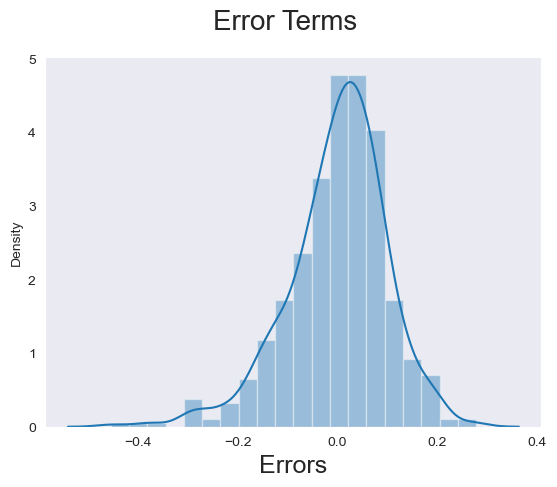

In [229]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18) 

In [231]:
Rfe_vars = ['year', 'holiday', 'temp', 'windspeed', 'season_2', 'season_4',
       'month_9', 'weather_condition_3']

<Figure size 640x480 with 0 Axes>

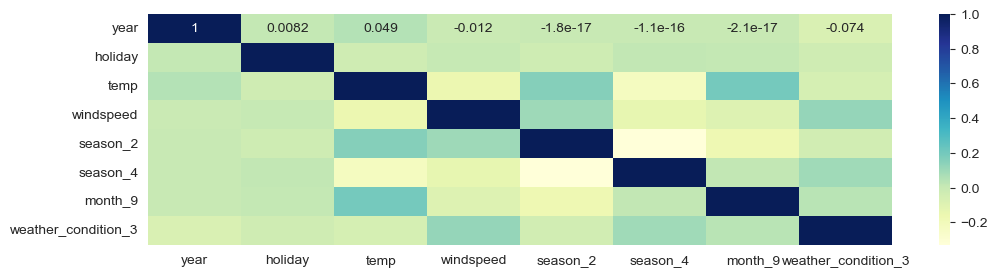

In [233]:
fig = plt.figure()
plt.figure(figsize=(12,3))
sns.heatmap(bike_sharing_2[Rfe_vars].corr(),cmap="YlGnBu", annot = True)
plt.show()

### Making Predictions

#### Applying the scaling on the test sets

In [235]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

### Dividing into X_test and y_test

In [237]:
y_test = df_test.pop('total_count')
X_test = df_test

In [239]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [241]:
# Making predictions
y_test_pred = lm.predict(X_test_new)

### Model Evaluation

Text(0, 0.5, 'y_test_pred')

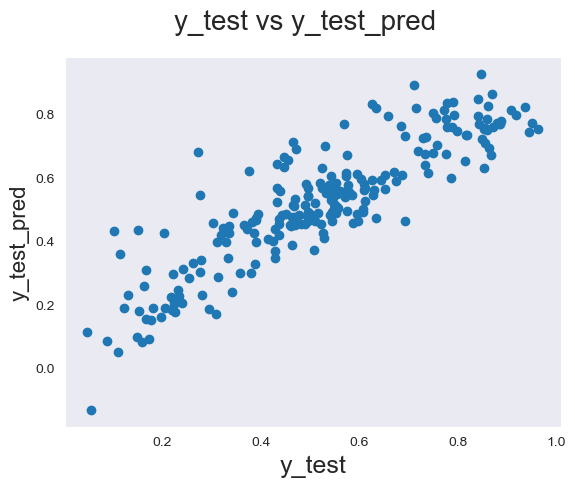

In [243]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)             
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_test_pred', fontsize=16) 

In [245]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.7720731949554799

In [247]:
r2_score(y_train, y_train_pred)

0.8038032148021996

### Conclusion and Observations.

R-squared scores for test and train (very close) we can conclude that Model learnt from training set will generalize very well on test set also. temp variable effects the most compared to other variables on the Model

Total significant independent variables are 8:    ['year', 'holiday', 'temp', 'windspeed', 'season_2', 'season_4',
       'month_9', 'weather_condition_3']

#### The Equation of best fitted line

Best line:  Total_count = 0.0875(const) + 0.2344 x year - 0.0867 x holiday + 0.5682 x temp - 0.1455 x windspeed + 0.0812 x season_2 + 0.1261 x season_4 + 0.0895 x month_9 - 0.2535 x weather_condition_3

#### Inferences of significant independant variables 


temp coefficient is (0.5682) high and +ve shows registrations are more in high temperatures due to clear weather.<br>
Bike sharing total count is increased from 2018 to 2019 (year coefficient 0.2334) after Covid-19. People are preferred to use bikes than public transport.<br>
Next significant variable is weather condition 3(coefficient -0.2535): Light Snow, Light Rain + Thunderstorm + Scattered clouds causes for low registrations.<br>
Next significant variable is windspeed (coefficient -0.1455): -ve shows bike riding is difficult hence registrations are reduced.